<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/Praktikum_DM_KMEANS_120450081.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan 1

## Import Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for statistical data visualization
%matplotlib inline

## Membuat dataset random dengan sklearn

In [ ]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

## Membuat visualisasinya

Text(0.5, 1.0, 'Blobs')

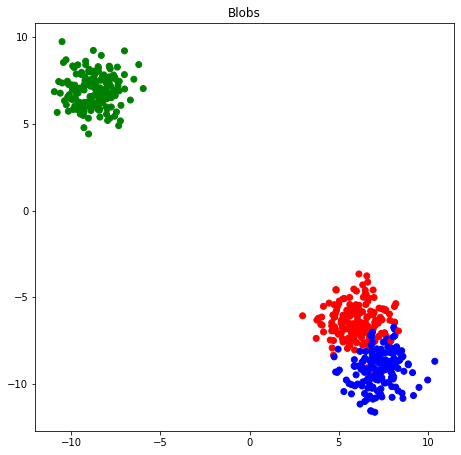

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
ax.scatter(blobs[:, 0], blobs[:, 1], c=rgb[classes])
ax.set_title('Blobs')

## Mendefinisikan 3 titik tengah dari 3 kluster

In [ ]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)
kmean.cluster_centers_

array([[-8.70023883,  6.95864267],
       [ 6.03116623, -6.40324676],
       [ 7.26667622, -9.25146195]])

## Visualisasikan Kembali

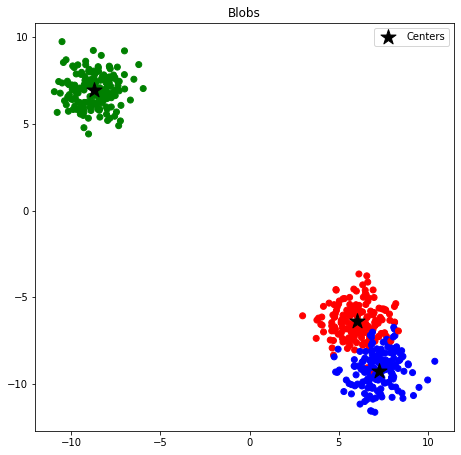

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], c=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*',
    c='black', s=250, label='Centers')
ax.set_title('Blobs')
ax.legend(loc='best')

## Periksa kmean label dan class apa kah sama

In [ ]:
kmean.labels_[:5]

array([0, 1, 0, 0, 1], dtype=int32)

In [ ]:
classes[:5]

array([1, 0, 1, 1, 0])

## Gunakan transform untuk mengubah output menjadi jarak dengan centroid.

In [ ]:
kmean.transform(blobs)[:5]

array([[ 1.35542141, 19.56222891, 22.49624877],
       [21.48104904,  1.67969772,  2.21630841],
       [ 2.30638623, 17.61111312, 20.45791789],
       [ 1.89307785, 18.03361365, 20.87896018],
       [19.25289546,  1.44290491,  4.33767437]])

## Optimisasi dengan mencari angka K atau berapa jumlah kluster yang menghasilkan akurasi yang baik. Pada percobaan kali ini akan digunakan silhoutte score dan elbow.

In [ ]:
blobs, classes = make_blobs(500, centers=3)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Blobs')

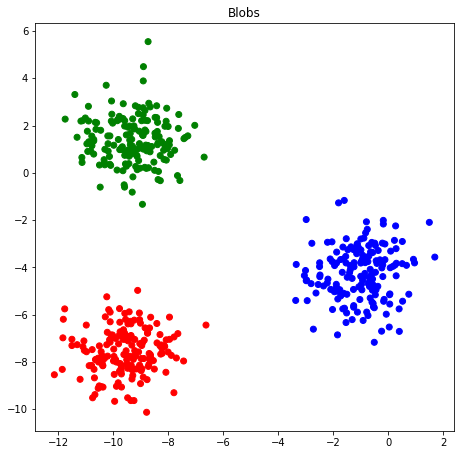

In [ ]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
rgb = np.array(['r', 'g', 'b'])
ax.scatter(blobs[:, 0], blobs[:, 1], c=rgb[classes])
ax.set_title('Blobs')

In [ ]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs, kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[2.        , 0.79145659],
       [0.        , 0.85838676],
       [1.        , 0.84721376],
       [0.        , 0.83899604],
       [2.        , 0.77244176]])

## Periksa nilai rata-rata dan skor silhoutte

In [ ]:
silhouette_samples.mean()

0.7973249731427692

In [ ]:
metrics.silhouette_score(blobs, kmean.labels_)

0.7973249731427692

## Visualisasikan plot berikut untuk mendapatkan angka terbaik pada clustering

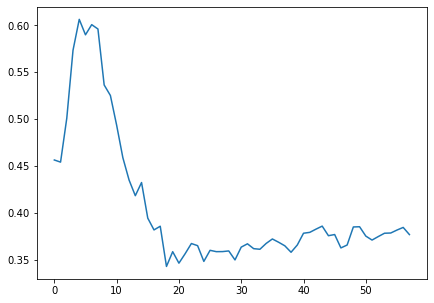

In [ ]:
blobs, classes = make_blobs(500, centers=10)
silhouette_avgs = []
for k in range(2, 60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)

## Bagaimana menurut anda untuk menentukan angka yang optimum berdasarkan plot di atas. Konfirmasi dengan perhitungan berikut.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(blobs)
    centers = km.cluster_centers_

    score = silhouette_score(blobs, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.45660187015024145)
For n_clusters = 3, silhouette score is 0.4544634058671676)
For n_clusters = 4, silhouette score is 0.5011347879755563)
For n_clusters = 5, silhouette score is 0.5734660110705393)
For n_clusters = 6, silhouette score is 0.6058124660563733)
For n_clusters = 7, silhouette score is 0.5896381493458498)
For n_clusters = 8, silhouette score is 0.5985668646062738)
For n_clusters = 9, silhouette score is 0.5964434741374405)
For n_clusters = 10, silhouette score is 0.5356811798499342)
For n_clusters = 11, silhouette score is 0.5139515248006978)
For n_clusters = 12, silhouette score is 0.5062183789450576)
For n_clusters = 13, silhouette score is 0.4533783898128404)
For n_clusters = 14, silhouette score is 0.4737506276220482)
For n_clusters = 15, silhouette score is 0.42892522482102907)
For n_clusters = 16, silhouette score is 0.4061627279620885)
For n_clusters = 17, silhouette score is 0.4113079447803431)
For n_clusters = 18, silhouett

## Selanjutnya untuk menetukan angka terbaik pada klastering maka metode elbow ini juga dapat digunakan

In [ ]:
wcss = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(blobs)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[29218.873279660485,
 14312.905446805207,
 10348.530794881966,
 6360.5534533641985,
 3494.2450444716455,
 2329.3176216187608,
 1744.885890851163,
 1185.3509862772205,
 992.816902915484,
 930.1126336275272,
 881.8535631680643,
 823.9487843843025,
 779.3479363185095,
 733.7471070356542,
 687.1507296768004,
 644.5402958203601,
 623.4976642308891,
 581.04103449312,
 561.6987668735507]

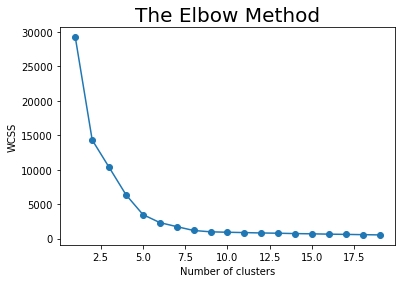

In [ ]:
plt.plot(range(1,20), wcss, marker='o')
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

berapa angka yang terbaik untuk klastering pada data ini? yang pertama.

# Latihan 2

Silakan unduh dataset, name file adalah credit_card.csv
[ini](https://drive.google.com/file/d/1iEAXYiXgzLOGcp_BlWWJcdEVlIG1Vx2r/view?usp=sharing)

## Import Library untuk data preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## 1. Definisikan Dataset
lalu tampilkan data dalam 10 baris atas dan 10 baris bawah.
Periksa berapa banyak jumlah kolom dan baris. Silahkan jawab pertanyaan berikut
dengan membuat skrip pemrograman di notebook Anda. 

In [ ]:
df = pd.read_csv('credit_card.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
df.shape

(8950, 18)

### a. Berapa dimensi dataset? Dan berapa jumlah instance dan variable (fitur) dalam dataset tersebut?

In [ ]:
df.shape

(8950, 18)

Terdiri dari 8950 baris dan 18 kolom.

### b. Tampilkan info dataset. Apa saja tipe data yang terkandung? 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

banyak, ada yang float64, int64, object.

### c. Periksa apakah terdapat data yang null atau data yang kosong. Dan bersihkan variabel yang tidak digunakan

In [ ]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [ ]:
# Replacing missing values in MINIMUM_PAYMENTS column with the mean of column

df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace = True)

In [ ]:
# Replacing missing values in CREDIT_LIMIT column with the mean of column

df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()), inplace = True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [ ]:
# Dropping any objext related variable
df = df.drop("CUST_ID", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## 2. Eksplorasi Data Analisis (Exploratory Data Analysis or EDA)
Anda di beri latihan berikut agar mendapatkan informasi penting terkait statistik dalam data lalu memvisualisasikannya agar menjadi sajian data yang mudah dimengerti orang lain. 

### a. Deskripsikan statstik dataset.

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### b. lakukan proses EDA dengan versi anda sendiri

In [ ]:
# Tenure Distribution

tenure_dist = df.groupby("TENURE").size().sort_values(ascending = False)
tenure_dist

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

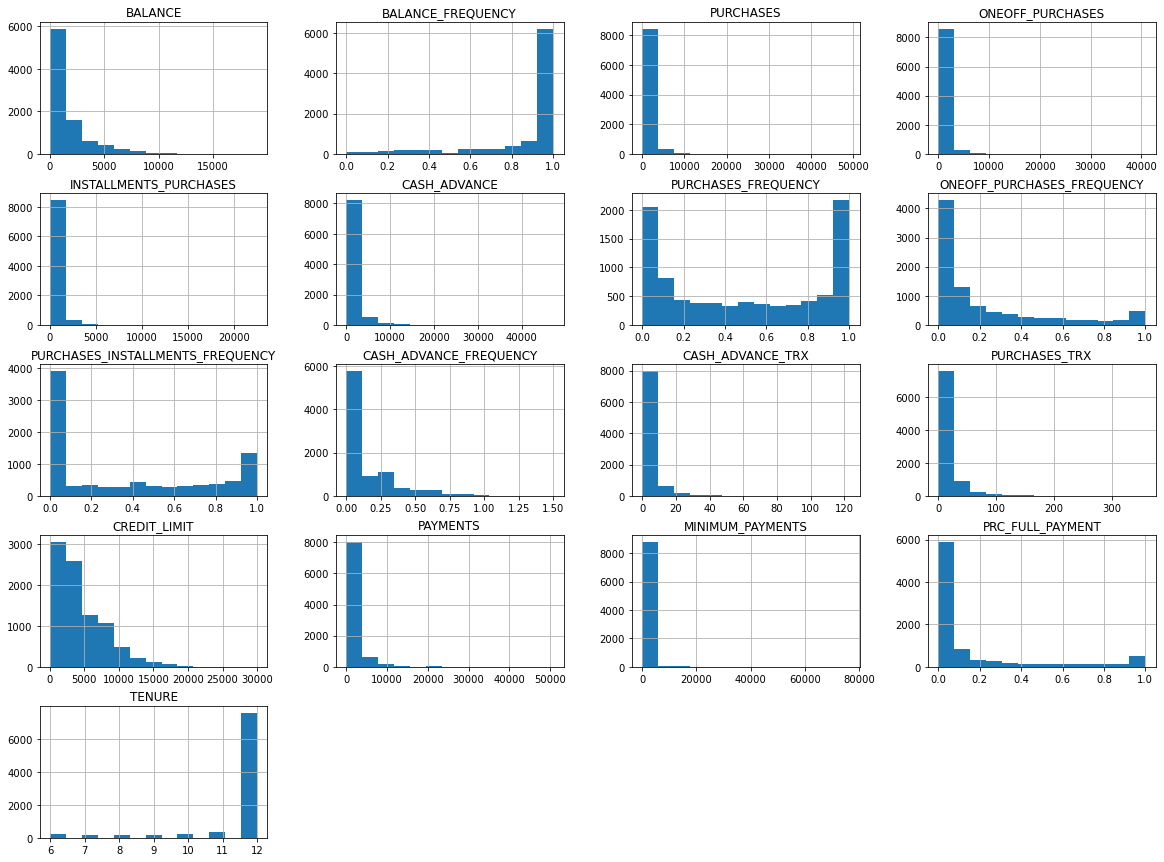

In [ ]:
df.hist(bins=13, figsize=(20, 15), layout=(5, 4))

<AxesSubplot:>

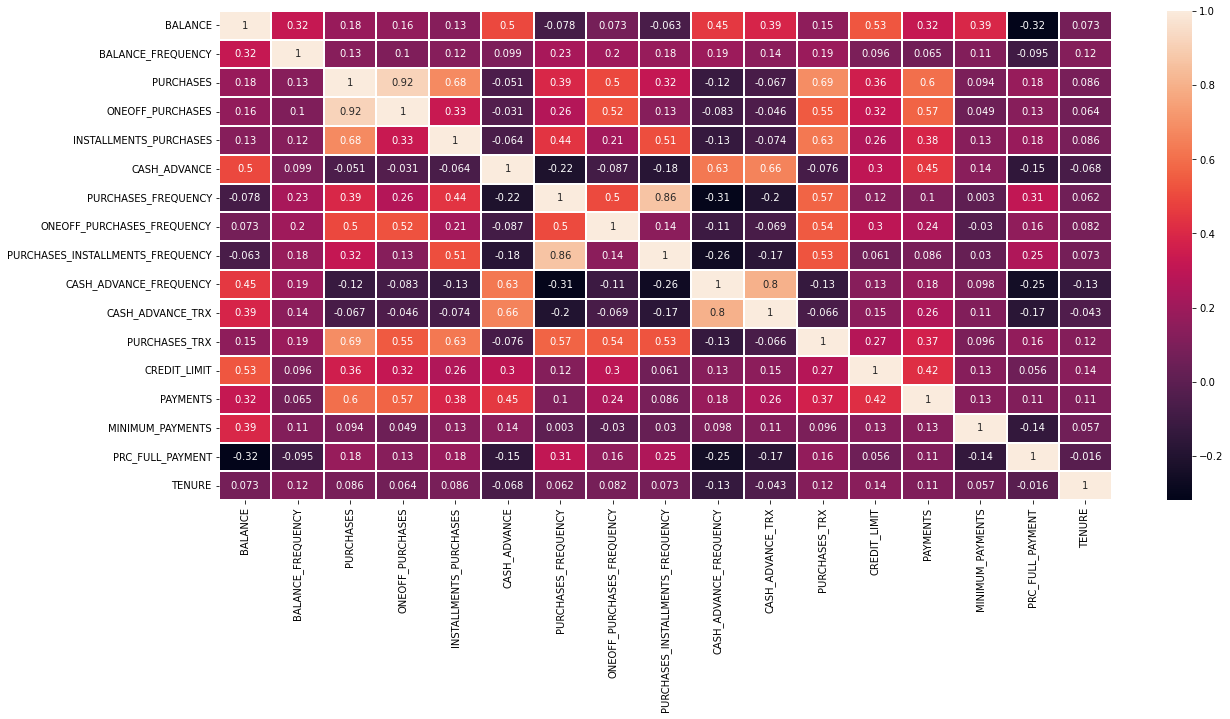

In [ ]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(20, 9))
sb.heatmap(corrmat, ax = ax, linewidths = 0.1, annot = True)

### c. Visualisasikan boxplot dan skewnes dari fitur dengan tipe data numerik, lanjutkan skrip pemrograman berikut

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Skewness:  2.393386042571806
Kurtosis:  7.6747512999062515


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

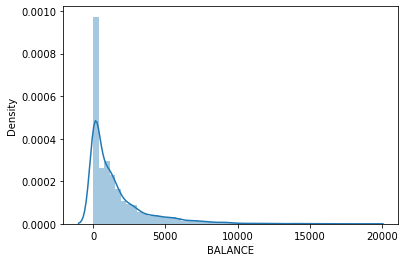

In [ ]:
print("Skewness: ", df['BALANCE'].skew())
print("Kurtosis: ", df['BALANCE'].kurt())
sb.distplot(df['BALANCE'])

#### ini

BALANCE
Skewness:  2.393386042571806
Kurtosis:  7.6747512999062515


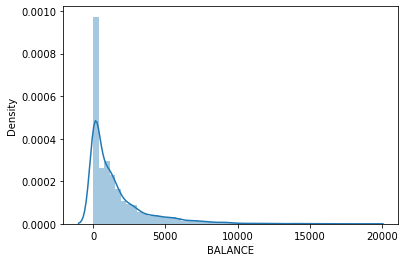

---------------------------
BALANCE_FREQUENCY
Skewness:  -2.0232655185149078
Kurtosis:  3.092369621585595


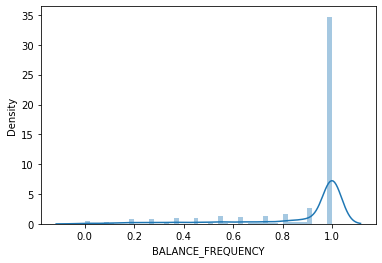

---------------------------
PURCHASES
Skewness:  8.144269064554651
Kurtosis:  111.38877085829522


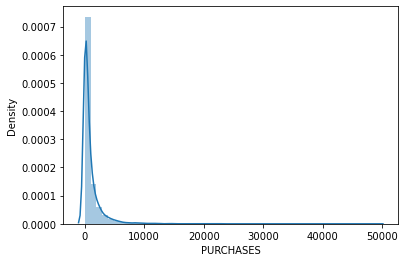

---------------------------
ONEOFF_PURCHASES
Skewness:  10.045082884700278
Kurtosis:  164.18757196835276


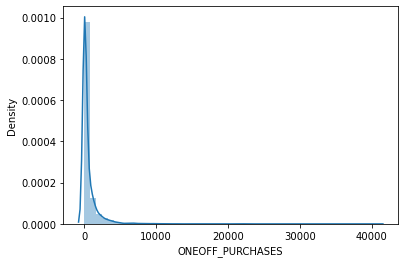

---------------------------
INSTALLMENTS_PURCHASES
Skewness:  7.299119908745641
Kurtosis:  96.57517752820031


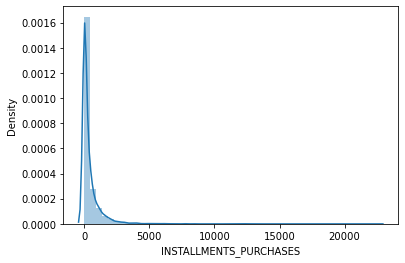

---------------------------
CASH_ADVANCE
Skewness:  5.166609074074723
Kurtosis:  52.89943410771164


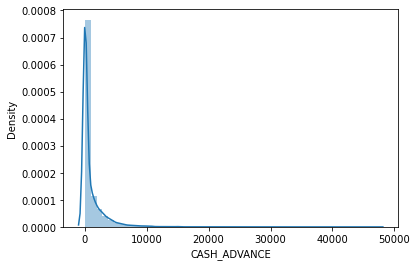

---------------------------
PURCHASES_FREQUENCY
Skewness:  0.060164235858035923
Kurtosis:  -1.638630947726387


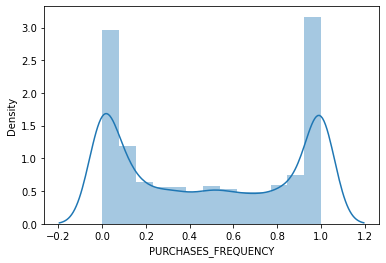

---------------------------
ONEOFF_PURCHASES_FREQUENCY
Skewness:  1.5356127835248519
Kurtosis:  1.1618456013706115


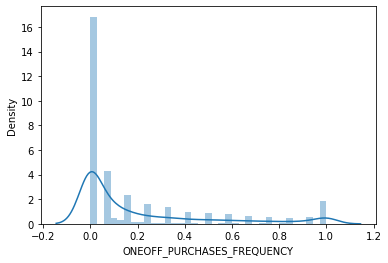

---------------------------
PURCHASES_INSTALLMENTS_FREQUENCY
Skewness:  0.5092011649999882
Kurtosis:  -1.3986321853836685


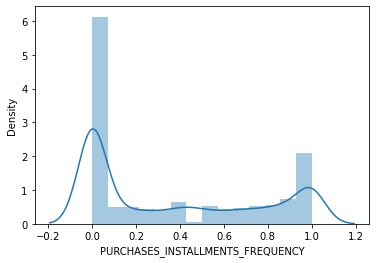

---------------------------
CASH_ADVANCE_FREQUENCY
Skewness:  1.828686266477852
Kurtosis:  3.33473432815736


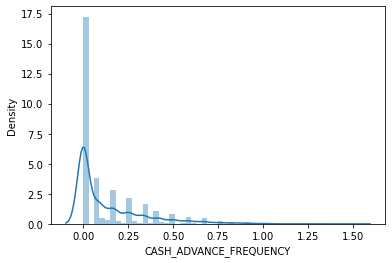

---------------------------
CASH_ADVANCE_TRX
Skewness:  5.721298203192298
Kurtosis:  61.64686247548569


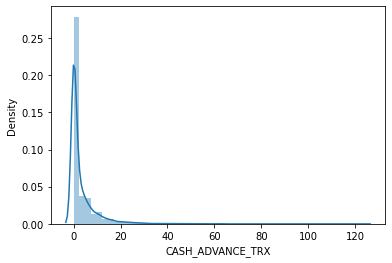

---------------------------
PURCHASES_TRX
Skewness:  4.630655265932403
Kurtosis:  34.793100255181066


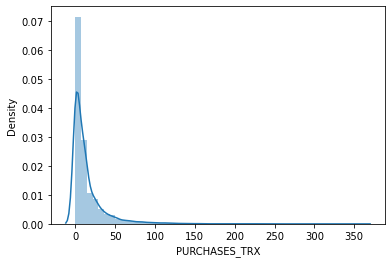

---------------------------
CREDIT_LIMIT
Skewness:  1.5225490377498587
Kurtosis:  2.83730800506102


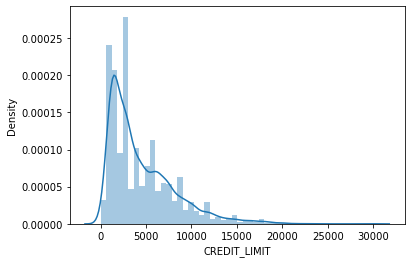

---------------------------
PAYMENTS
Skewness:  5.907619794397562
Kurtosis:  54.770735812137545


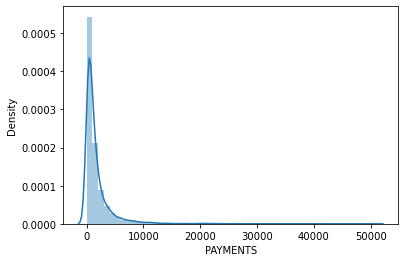

---------------------------
MINIMUM_PAYMENTS
Skewness:  13.867357259762558
Kurtosis:  294.38439277183386


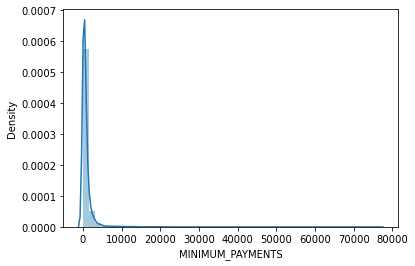

---------------------------
PRC_FULL_PAYMENT
Skewness:  1.942819940971858
Kurtosis:  2.432395300581188


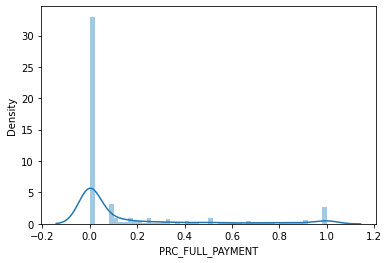

---------------------------
TENURE
Skewness:  -2.9430172876199134
Kurtosis:  7.694823185610918


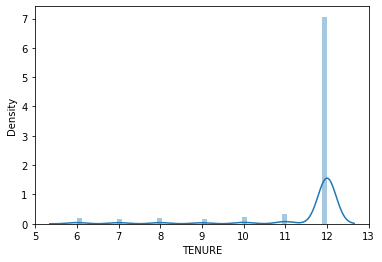

---------------------------


In [ ]:
# make visualization skewnewss and kurtosis from all columns
for column in df.columns:
    print(column)
    print("Skewness: ", df[column].skew())
    print("Kurtosis: ", df[column].kurt())
    sb.distplot(df[column])
    plt.show()
    print('---------------------------')

## 3. . Mencari angka optimum clustering. Gunakan dua metode elbow dan silhoutte. Output berupa grafik dan jumlah kemungkinan n clustering pada silhoutte.

### Silhoutte

In [ ]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [ ]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    score = metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.45913031286895445
Silhouette score for k(clusters) = 4 is 0.38102444549500764
Silhouette score for k(clusters) = 5 is 0.37666249218430387
Silhouette score for k(clusters) = 6 is 0.37800822183700056
Silhouette score for k(clusters) = 7 is 0.35314022411001167
Silhouette score for k(clusters) = 8 is 0.35959487533502044
Silhouette score for k(clusters) = 9 is 0.3405452070757968
Silhouette score for k(clusters) = 10 is 0.3509244508886415
Silhouette score for k(clusters) = 11 is 0.35261193014004893
Silhouette score for k(clusters) = 12 is 0.36101189968816144


In [ ]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.459130
1,4,0.381024
2,5,0.376662
3,6,0.378008
4,7,0.353140
5,8,0.359595
6,9,0.340545
7,10,0.350924
8,11,0.352612
9,12,0.361012


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

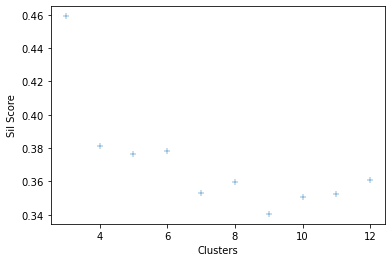

In [ ]:
sb.scatterplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

### Elbow

In [ ]:
import sklearn.cluster as cluster

In [ ]:
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,3.930610e+11
1,2,2.792966e+11
2,3,2.328064e+11
3,4,2.067324e+11
4,5,1.817582e+11
5,6,1.624019e+11
6,7,1.452836e+11
7,8,1.328727e+11
8,9,1.241865e+11
9,10,1.171223e+11


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

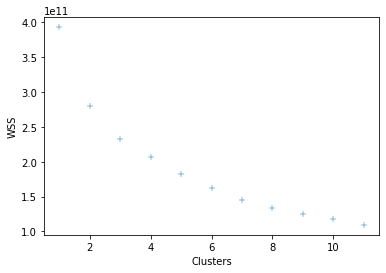

In [ ]:
sb.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

## 4. Lakukan normalisasi data, lalu cek distribusi data pada Balance dan apakah sama sebelum dilakukan normalisasi?

In [ ]:
# get balanced data
df['BALANCE']

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

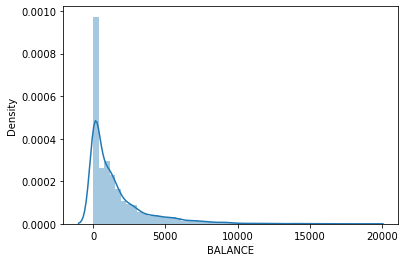

In [ ]:
# check distribution of BALANCE
sb.distplot(df['BALANCE'])

In [ ]:
# create new dataframe with BALANCE
df_balance = pd.DataFrame(df['BALANCE'])

# do transformation 
df_balance['BALANCE'] = np.log(df['BALANCE'])

# replace if value is -inf with 0
df_balance['BALANCE'] = df_balance['BALANCE'].replace(-np.inf, 0)

/Users/dimas/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_balance['BALANCE']

0       3.711148
1       8.071677
2       7.822104
3       7.418583
4       6.706513
          ...   
8945    3.349677
8946    2.954036
8947    3.152679
8948    2.599541
8949    5.920795
Name: BALANCE, Length: 8950, dtype: float64

<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

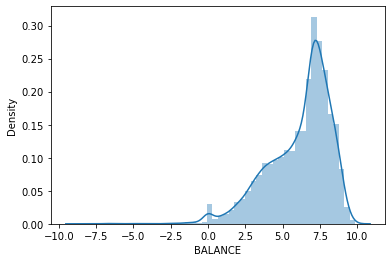

In [ ]:
# check distribution of BALANCE
sb.distplot(df_balance['BALANCE'])

## 5. Lakukan proses clustering dengan, memanggil kmeans dari scikitlearn library, lalu definisikan n_cluster yang sudah di dapat dari angka optimum. Tambahkan kolom baru dengan df['Kmeans_label'] yang memuat dari kmeans.labels_

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Antara CREDIT_LIMIT-BALANCE

In [ ]:
X = df.iloc[:,[12,0]]
X.head()

,CREDIT_LIMIT,BALANCE
0,1000.0,40.900749
1,7000.0,3202.467416
2,7500.0,2495.148862
3,7500.0,1666.670542
4,1200.0,817.714335


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = X.values

In [ ]:
df['Kmeans_label'] = pd.DataFrame(y_kmeans)

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Kmeans_label
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


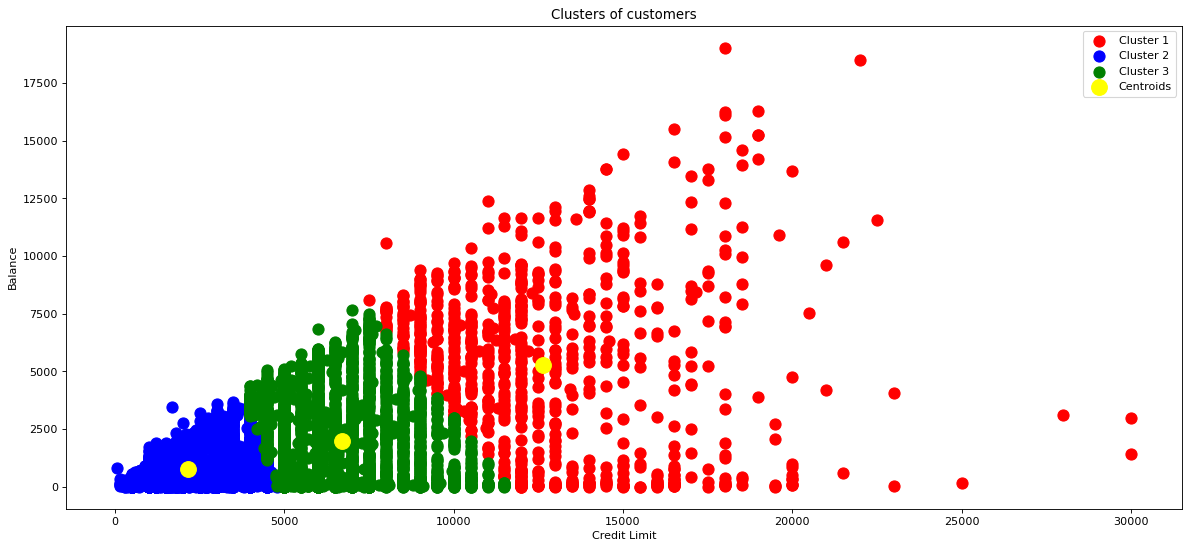

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

## 6. Visualisasikan setiap kolom atau fitur di dataset terhadap fitur balance (sebagai variabel x) dengan scatter plot dan tampilkan legend dari grafiknya. Analisis hasil dari grafik di atas! Bagaimana kesimpulan Anda?

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Kmeans_label'],
      dtype='object')

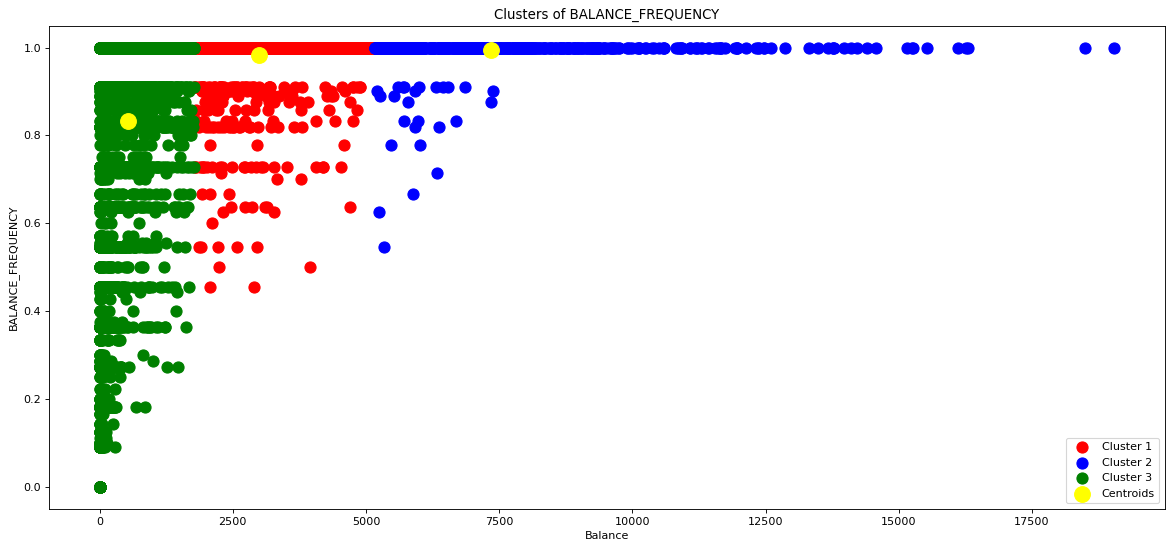

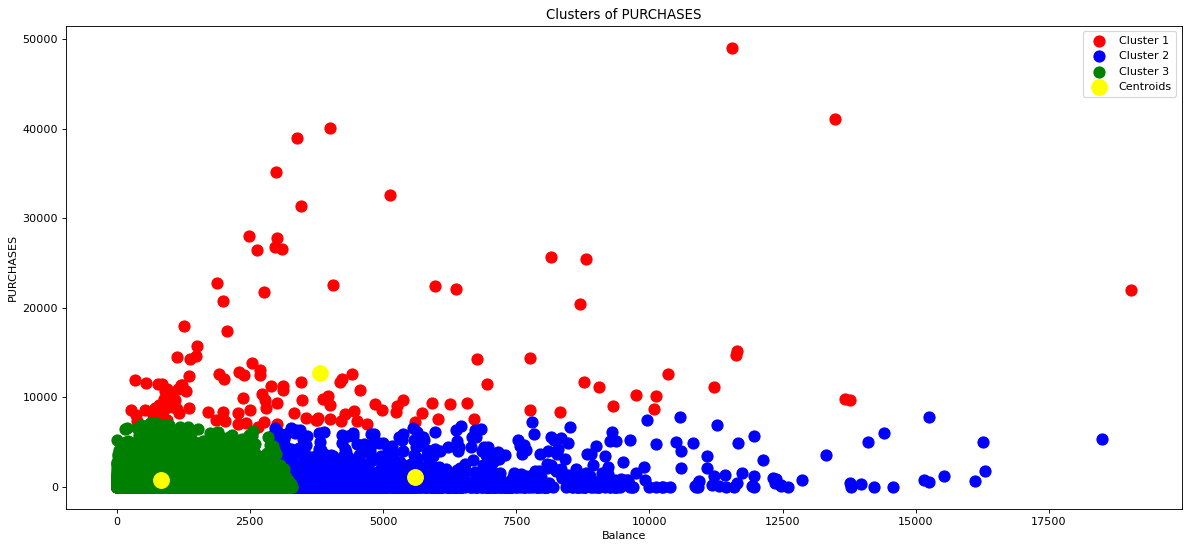

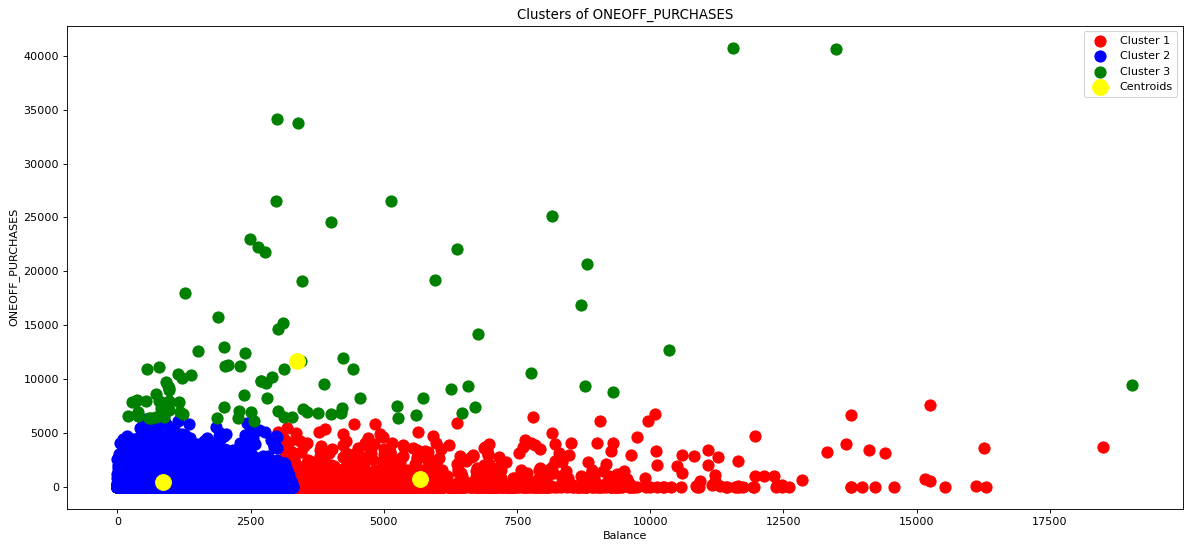

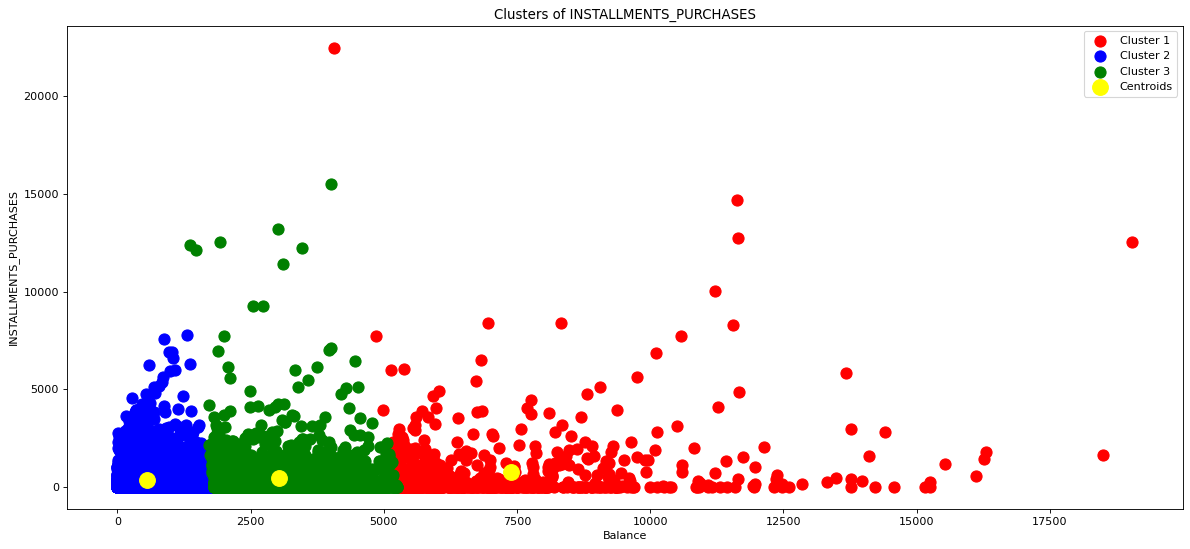

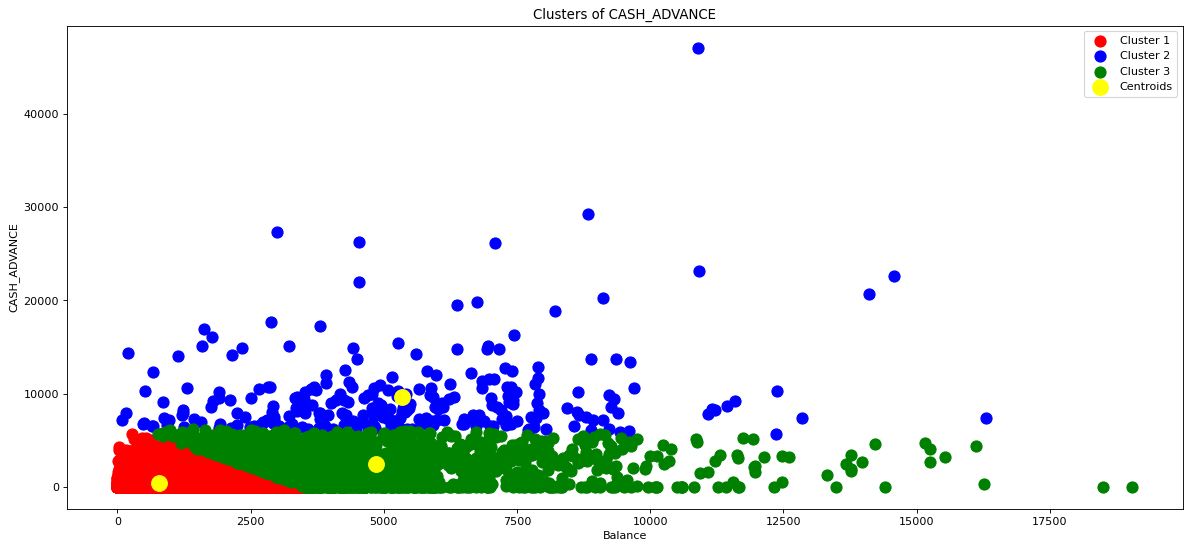

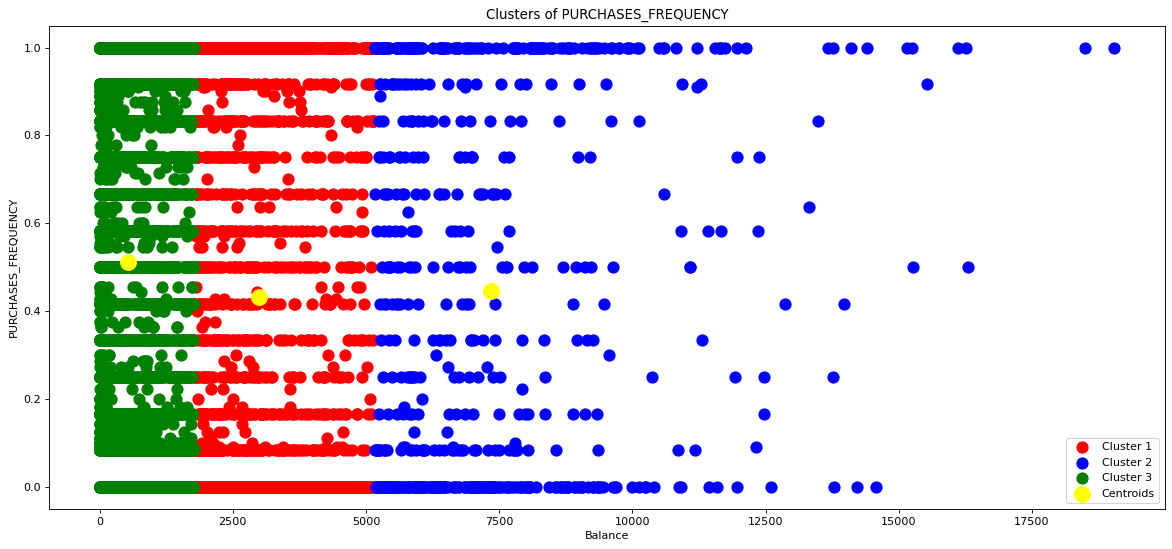

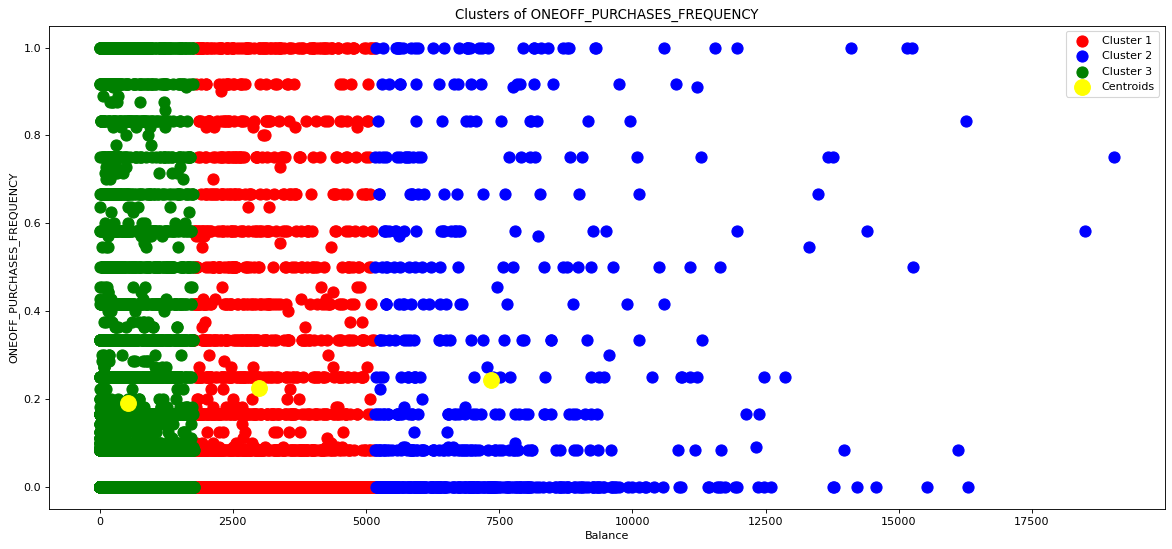

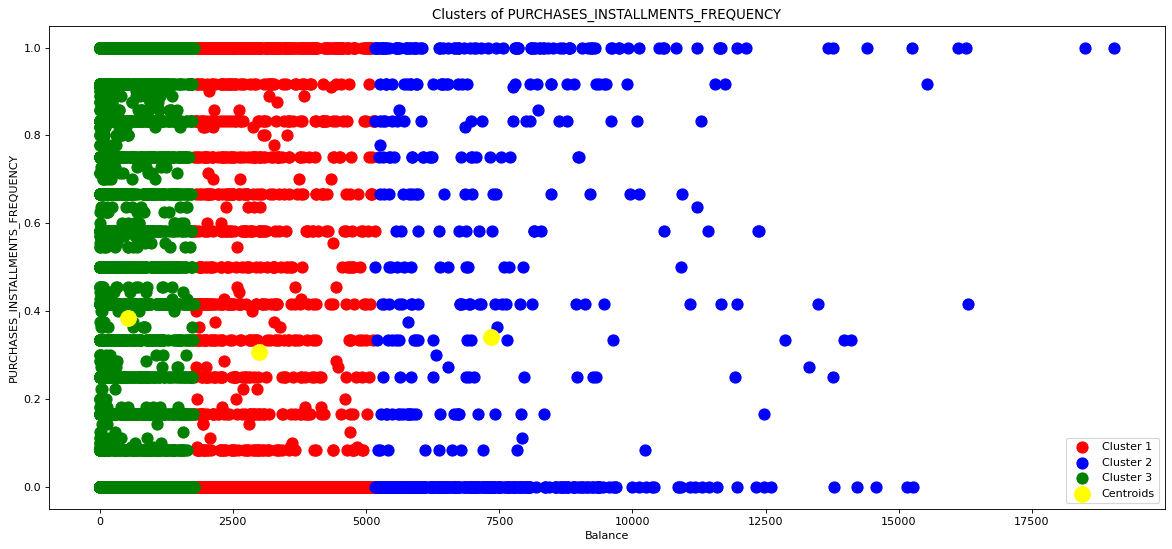

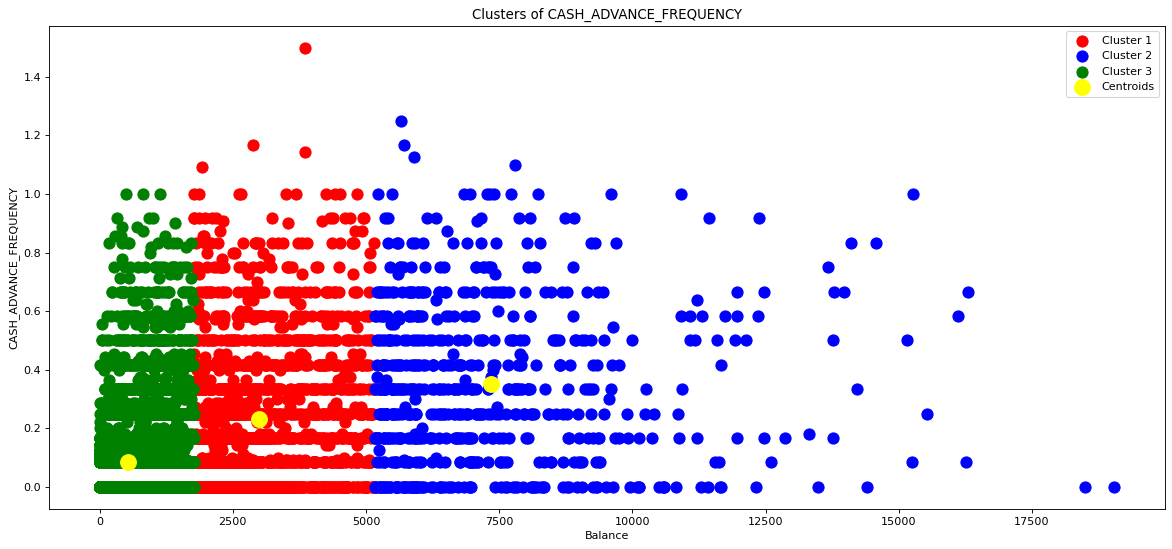

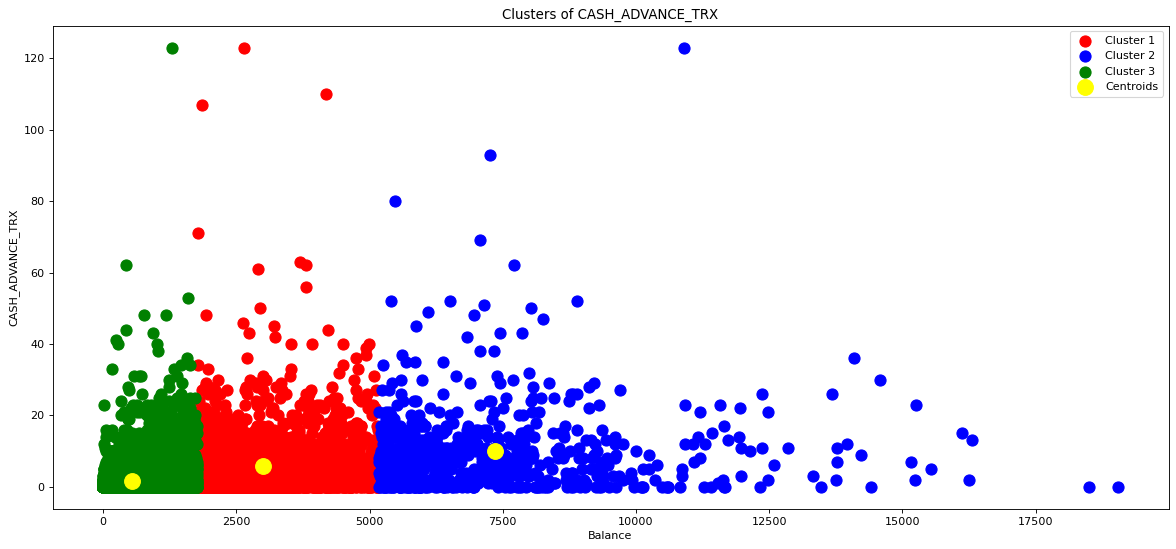

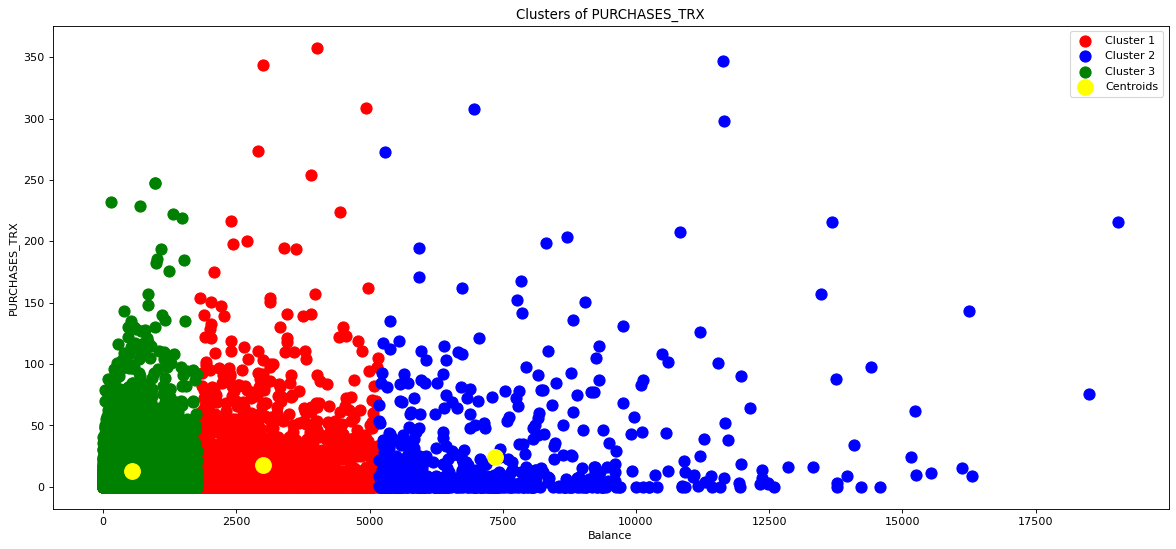

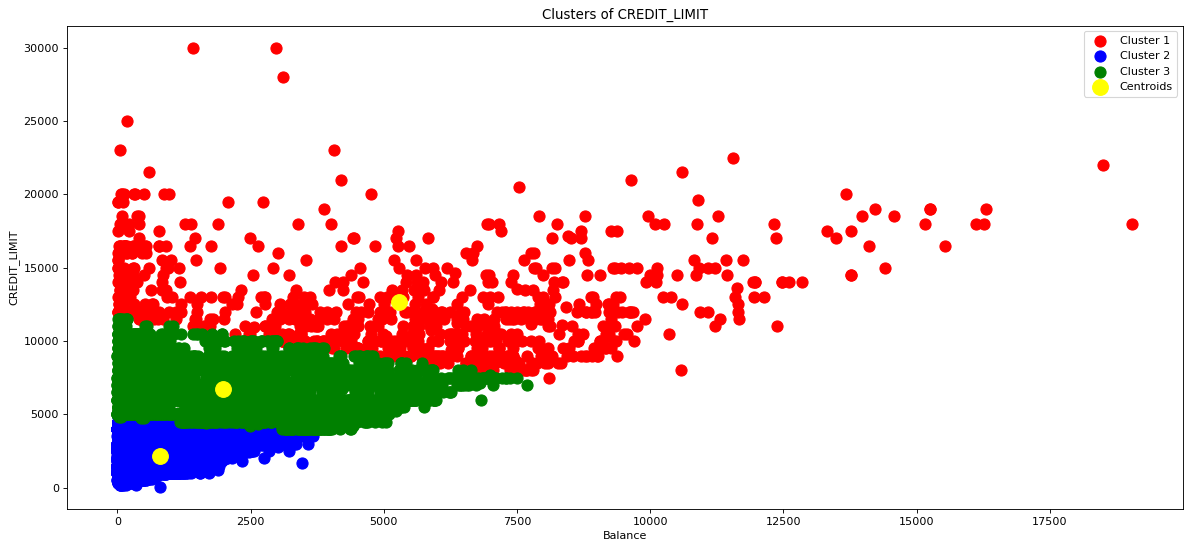

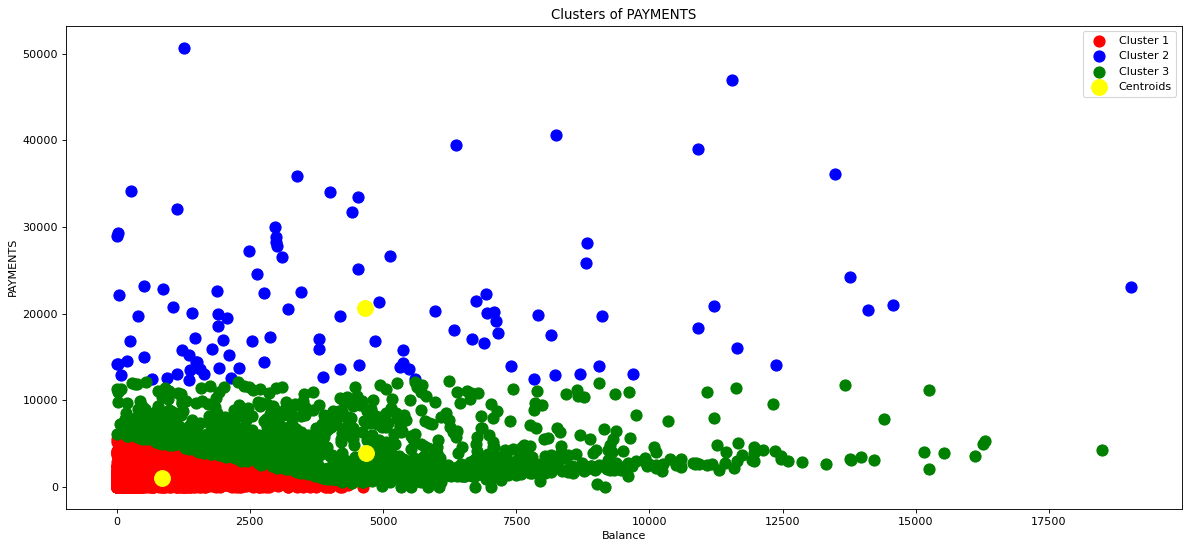

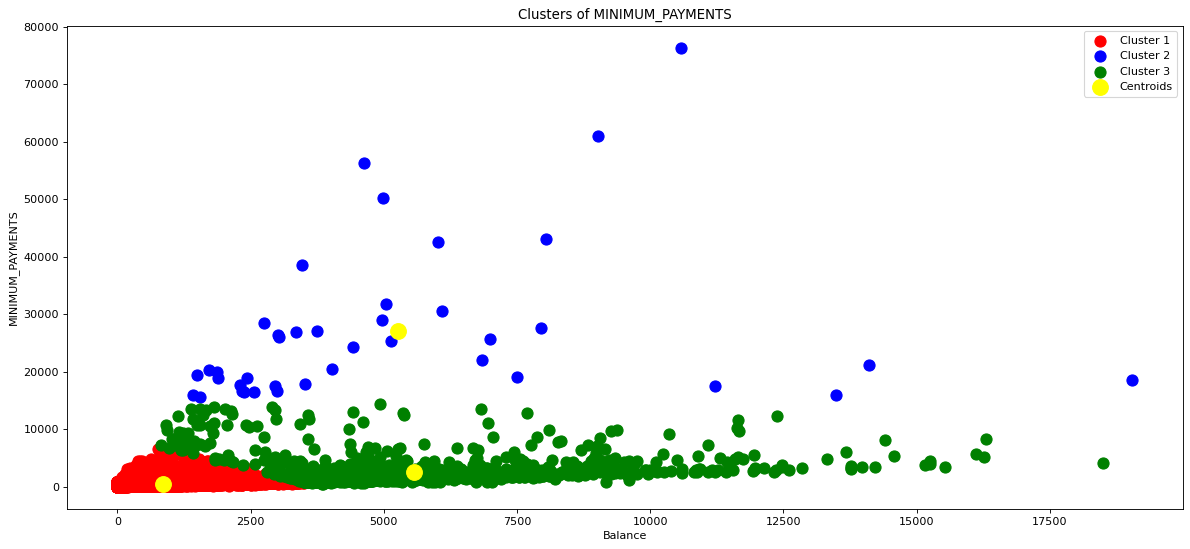

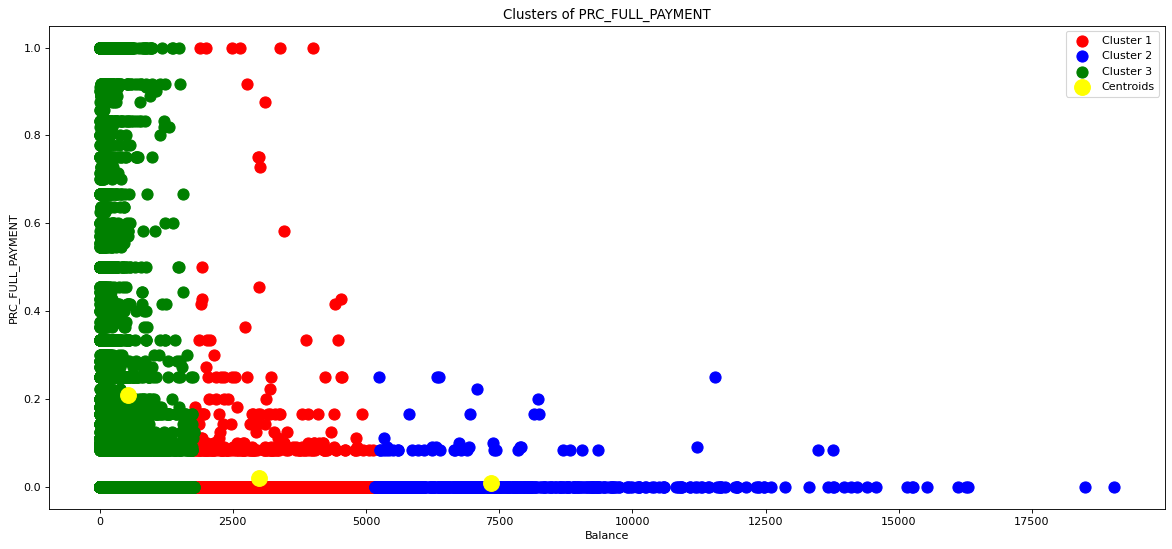

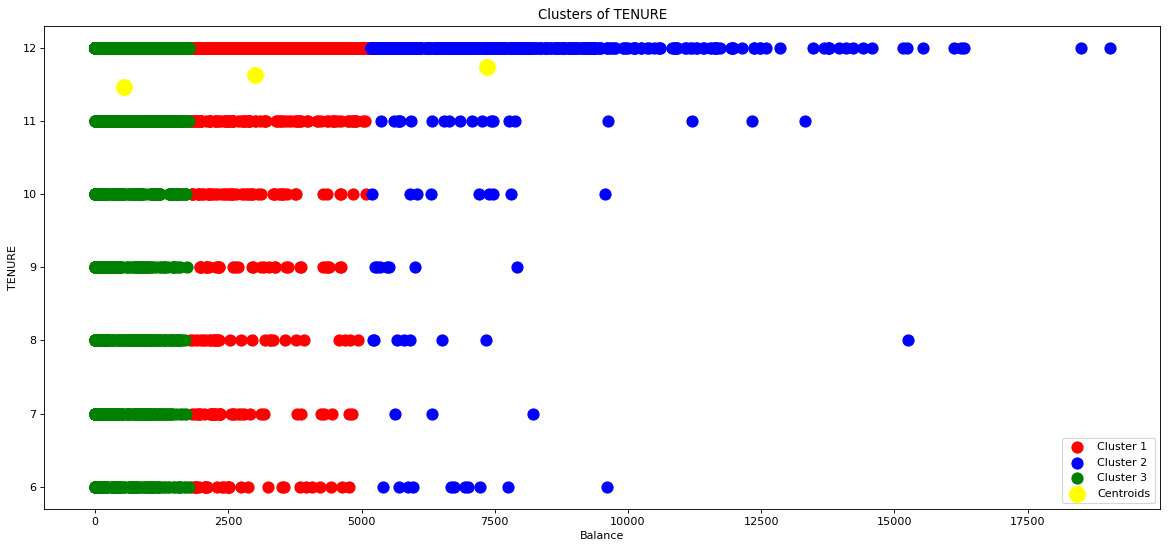

In [ ]:
for column in range(1, 17):
    X = df.iloc[:,[0, column]]

    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    X = X.values

    plt.figure(figsize=(18, 8), dpi=80)
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
    # plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
    plt.title(f'Clusters of {df.columns[column]}')
    plt.xlabel('Balance')
    plt.ylabel(df.columns[column])
    plt.legend()
    plt.show()

Terlihat sangat menarik hasilnya, terdiri dari 3 kluster. Persebarannya juga bagus.